<a href="https://colab.research.google.com/github/tnwls6865/Creative_Masters/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creative Masters

## OpenAI Gym

OpenAI Gym은 다양한 환경에서 설정하기 쉬운 일반 지능 벤치마크를 제공하는 것을 목표로 합니다. 목표는 출판된 연구를 보다 쉽게 재현할 수 있도록 AI 연구 출판물에서 환경이 정의되는 방식을 표준화하는 것입니다. 이 프로젝트는 사용자에게 간단한 인터페이스를 제공한다고 주장합니다. 2017년 6월부터 개발자는 Python에서만 Gym을 사용할 수 있습니다.

OpenAI gym is pip-installed onto your local machine. There are a few significant limitations to be aware of:

- OpenAI Gym Atari only directly supports Linux and Macintosh
- OpenAI Gym Atari can be used with Windows; however, it requires a particular installation procedure
- OpenAI Gym can not directly render animated games in Google CoLab. (OpenAI Gym은 Google CoLab에서 게임을 직접 렌더링할 수 없습니다.)

Gym의 핵심은 강화학습이 활용될 "게임"을 정의하는 환경입니다. 물론 환경이 무조건 게임일 필요는 없습니다. 그러나 다음과 같은 게임과 유사한 기능을 필요로 합니다.

- Action Space: 환경을 변경하기 위해 각 단계/에피소드에서 환경에 대해 어떤 조치를 취할 수 있는가?
- Observation Space: 우리가 관찰할 수 있는 현재 상태는 무엇인가?

Gym을 살펴보기 전에 해당 라이브러리에서 사용하는 일부 용어를 숙지하는 것이 필요합니다.

    Agent - The machine learning program or model that controls the actions. Step - One round of issuing actions that affect the observation space.
    Episode - A collection of steps that terminates when the agent fails to meet the environment's objective or the episode reaches the maximum number of allowed steps.
    Render - Gym can render one frame for display after each episode.
    Reward - A positive reinforcement that can occur at the end of each episode, after the agent acts.
    Non-deterministic - For some environments, randomness is a factor in deciding what effects actions have on reward and changes to the observation space.

(추가1: 현재 OpenAI Gym은 0.23 버전까지 출시되었습니다. 하지만 기존의 라이브러리들은 대다수가 0.21 버전을 활용하고 있습니다. 본 실습에서는 0.23버전으로 진행을 하지만, 기존의 모델들을 활용하고 싶다면 0.21 버전을 활용하셔야 합니다.) \\
(추가2: 현재 Colab은 환경 안정성을 위해 python과 CUDA등에 대해서 가장 최신 버젼만을 제공하고 있습니다. 현재 0.21 버전의 OpenAI Gym을 Colab에서 설치하면 오류가 발생하므로 0.21버전을 사용하고 싶으실 경우 Local환경에서 사용해주시기 바랍니다.)

In [3]:
import gym

def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Nondeterministic: {spec.nondeterministic}")
    print(f"Reward Range: {env.reward_range}")
    print(f"Reward Threshold: {spec.reward_threshold}")

### Mountain Car

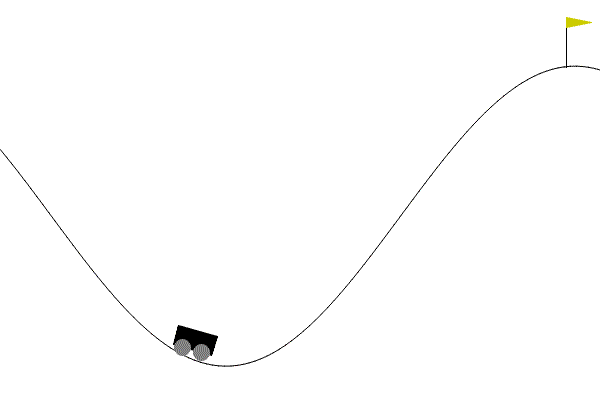

In [2]:
query_environment("MountainCar-v0")

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


이 환경에서는 전진 가속, 감속 또는 후진의 세 가지 고유한 작업을 수행할 수 있습니다. 상자 개체에서 알 수 있듯이 관찰 공간에는 두 개의 연속(부동 소수점) 값이 포함되어 있습니다. 관찰 공간은 단순히 자동차의 위치와 속도입니다. 자동차는 각 에피소드에서 탈출할 수 있는 200개의 단계가 있습니다. 코드를 살펴봐야 하지만 산악 차량은 증분 보상을 받지 못합니다. 차량에 대한 유일한 보상은 계곡을 탈출할 때 발생합니다.

### Cart Pole

**CartPole-v1** 환경은 기둥의 균형을 맞추는 것을 목표로 합니다. 환경에는 4개의 연속 숫자로 된 observation space가 있습니다.

* Cart Position
* Cart Velocity
* Pole Angle
* Pole Velocity At Tip

이 목표를 달성하기 위해 다음 작업을 수행할 수 있습니다.

* Push cart to the left
* Push cart to the right

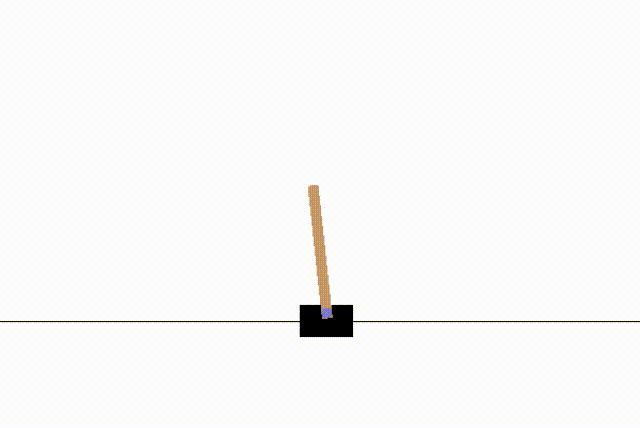

In [3]:
query_environment("CartPole-v1")

Action Space: Discrete(2)
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Max Episode Steps: 500
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 475.0


### Breakout

Breakout과 같은 Atari 게임은 Atari 화면 크기(210x160)와 동일한 관찰 공간을 사용하거나 심지어 Atari의 RAM(128바이트)을 사용하여 게임의 상태를 결정할 수 있습니다.

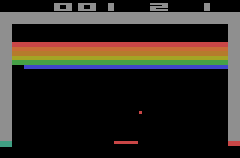

In [4]:
!pip3 install atari-py
!pip install ale-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.5 MB/s eta 0:00:00


In [5]:
# HIDE OUTPUT
!wget http://www.atarimania.com/roms/Roms.rar 
!unrar x -o+ /content/Roms.rar >/dev/nul
!python -m atari_py.import_roms /content/ROMS >/dev/nul

--2023-05-12 14:19:49--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19612325 (19M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.70M   301KB/s    in 65s     

2023-05-12 14:20:55 (295 KB/s) - ‘Roms.rar’ saved [19612325/19612325]



In [1]:
!pip install gym[accept-rom-license]
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gym

query_environment('Breakout-v0')

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(


Action Space: Discrete(4)
Observation Space: Box(0, 255, (210, 160, 3), uint8)
Max Episode Steps: 10000
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
query_environment("Breakout-ram-v0")

Action Space: Discrete(4)
Observation Space: Box(0, 255, (128,), uint8)
Max Episode Steps: 10000
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None


/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Breakout-ram-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(


### Render OpenAI Gym Environments from Colab

CoLab에서도 에이전트가 플레이하는 게임을 시각화할 수 있습니다. 이 섹션에서는 에이전트가 플레이하는 게임의 에피소드를 보여주는 CoLab에서 비디오를 생성하는 방법에 대한 정보를 제공합니다. 

In [6]:
# HIDE OUTPUT
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import gym
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""


def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    return env

In [14]:
env = wrap_env(gym.make("Atlantis-v0"))

observation = env.reset()

while True:

    env.render()

    # your agent goes here
    action = env.action_space.sample()

    observation, reward, done, info = env.step(action)

    if done:
        break

env.close()
show_video()

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Atlantis-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment Atlantis-v0 initialized with `render_mode=None` is marked as 

In [25]:
env = wrap_env(gym.make("MountainCar-v0"))

observation = env.reset()

while True:

    env.render()

    # your agent goes here
    action = env.action_space.sample()

    observation, reward, done, info = env.step(action)

    if done:
        break

env.close()
show_video()

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  @abstractmethod
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  
/usr/local/lib/python3.9/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment Mountain

## Random Action

ss

In [2]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [3]:
# HIDE OUTPUT
if COLAB:
  !sudo apt-get install -y xvfb ffmpeg x11-utils
  !pip install -q gym
  !pip install -q 'imageio==2.4.0'
  !pip install -q PILLOW
  !pip install -q 'pyglet==1.3.2'
  !pip install -q pyvirtualdisplay
  !pip install -q tf-agents
  !pip install -q pygame

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils
  xfonts-base xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
  x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,920 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1

### 관련 용어

* **Agent** - Agent는 Reward를 받기 위해 상태에 영향을 미치는 행동을 하는, 해당 상태(환경)에 존재하는 개체입니다.
* **Environment** - Environment는 Agent가 존재하는 공간입니다. Environment은 항상 Agent의 동작에 의해 변경되는 특정 상태에 있습니다.
* **Actions** - Agent가 환경을 변경하기 위해 하는 행동들입니다.
* **Step** - Step은 Agent가 작업을 수행하고 잠재적으로 환경 상태를 변경할 때 발생합니다.
* **Episode** - A chain of steps that ultimately culminates in the environment entering a terminal state. (구글번역: 최종 상태로 들어가는 환경에서 궁극적으로 culminate에 이르는 일련의 단계입니다.)

### Mountain Car 추가 설명

Mountain Car는 자동차가 산을 올라야 하는 Environment입니다. 중력이 자동차의 엔진보다 강하기 때문에 풀악셀로 급경사를 오를 수 없습니다. 자동차는 Valley(골짜기)에 위치하며 자동차가 가장 오른쪽 언덕 꼭대기에 있는 목표에 도달하기 위해서는 반대편 언덕을 올라서 위치 에너지를 활용하는 방법을 배워야 합니다서

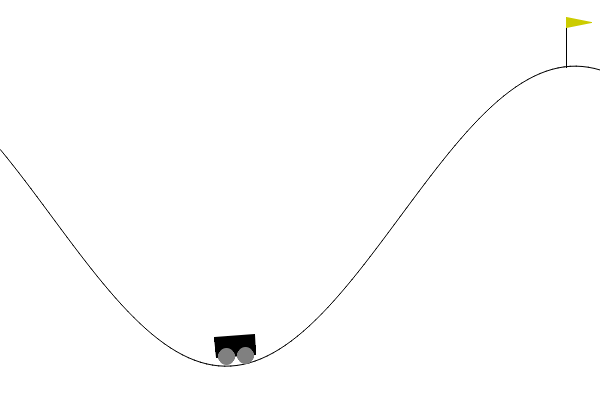

In [4]:
import tf_agents
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

env_name = 'MountainCar-v0'
env = suite_gym.load(env_name)
env.reset()
PIL.Image.fromarray(env.render())

Mountain car environment는 다음의 action을 제공합니다:

* 0 - Apply left force
* 1 - Apply no force
* 2 - Apply right force

Mountain car environment는 다음의 연속형 변수들로 구성되어 있습니다:

* state[0] - Position 
* state[1] - Velocity

In [5]:
import gym
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" 
                type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    return env

이제 Random으로 자동차를 움직여보도록 하겠습니다.

In [6]:
import gym

if COLAB:
    env = wrap_env(gym.make("MountainCar-v0"))
else:
    env = gym.make("MountainCar-v0")

env.reset()
done = False

i = 0
while not done:
    i += 1
    state, reward, done, _ = env.step(2)
    env.render()
    print(f"Step {i}: State={state}, Reward={reward}")

env.close()

Step 1: State=[-0.535733    0.00109922], Reward=-1.0
Step 2: State=[-0.53354275  0.00219021], Reward=-1.0
Step 3: State=[-0.53027797  0.00326478], Reward=-1.0
Step 4: State=[-0.5259631   0.00431487], Reward=-1.0
Step 5: State=[-0.52063054  0.0053326 ], Reward=-1.0
Step 6: State=[-0.5143202   0.00631034], Reward=-1.0
Step 7: State=[-0.5070794   0.00724076], Reward=-1.0
Step 8: State=[-0.4989625   0.00811692], Reward=-1.0
Step 9: State=[-0.4900302   0.00893231], Reward=-1.0
Step 10: State=[-0.4803492   0.00968097], Reward=-1.0
Step 11: State=[-0.4699917   0.01035751], Reward=-1.0
Step 12: State=[-0.4590345   0.01095719], Reward=-1.0
Step 13: State=[-0.44755852  0.01147598], Reward=-1.0
Step 14: State=[-0.43564793  0.01191061], Reward=-1.0
Step 15: State=[-0.42338932  0.01225861], Reward=-1.0
Step 16: State=[-0.410871    0.01251831], Reward=-1.0
Step 17: State=[-0.39818215  0.01268887], Reward=-1.0
Step 18: State=[-0.38541186  0.01277028], Reward=-1.0
Step 19: State=[-0.37264854  0.012763

In [7]:
show_video()

이번에는 될때까지 한번 확인을 해보겠습니다.

In [8]:
import gym

if COLAB:
    env = wrap_env(gym.make("MountainCar-v0"))
else:
    env = gym.make("MountainCar-v0")

state = env.reset()
done = False

i = 0
while not done:
    i += 1

    if state[1] > 0:
        action = 2
    else:
        action = 0

    state, reward, done, _ = env.step(action)
    env.render()
    print(f"Step {i}: State={state}, Reward={reward}")

env.close()

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:41: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Step 1: State=[-0.48613822 -0.00128997], Reward=-1.0
Step 2: State=[-0.4887086  -0.00257034], Reward=-1.0
Step 3: State=[-0.49254012 -0.00383154], Reward=-1.0
Step 4: State=[-0.49760425 -0.00506414], Reward=-1.0
Step 5: State=[-0.50386316 -0.0062589 ], Reward=-1.0
Step 6: State=[-0.51127    -0.00740683], Reward=-1.0
Step 7: State=[-0.51976925 -0.00849928], Reward=-1.0
Step 8: State=[-0.52929723 -0.009528  ], Reward=-1.0
Step 9: State=[-0.5397825  -0.01048526], Reward=-1.0
Step 10: State=[-0.55114645 -0.01136393], Reward=-1.0
Step 11: State=[-0.563304   -0.01215756], Reward=-1.0
Step 12: State=[-0.5761645  -0.01286047], Reward=-1.0
Step 13: State=[-0.58963233 -0.01346786], Reward=-1.0
Step 14: State=[-0.6036082  -0.01397584], Reward=-1.0
Step 15: State=[-0.6179897  -0.01438152], Reward=-1.0
Step 16: State=[-0.6326727  -0.01468301], Reward=-1.0
Step 17: State=[-0.6475522  -0.01487948], Reward=-1.0
Step 18: State=[-0.66252327 -0.0149711 ], Reward=-1.0
Step 19: State=[-0.67748237 -0.014959

In [9]:
# HIDE OUTPUT
show_video()

## Q-Learning

Q-Learning은 Model이 없이(Model-Free) 학습하는 강화학습 알고리즘이다. Q-Learning의 목표는 유한한 마르코프 결정 과정(FMDP)에서 Agent가 특정 상황에서 특정 행동을 하라는 최적의 Policy를 배우는 것으로, 현재 상태로부터 시작하여 모든 연속적인 단계들을 거쳤을 때 전체 보상의 예측값을 극대화시킨다. 이것은 한 상태에서 다른 상태로의 전이가 확률적으로 일어나거나 보상이 확률적으로 주어지는 환경에서도 별다른 변형 없이 적용될 수 있다. 또한 "Q"라는 단어는 현재 상태에서 취한 행동의 보상에 대한 quality를 상징한다.

![Reinforcement Learning](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/reinforcement.png "Reinforcement Learning")


(수식은 참조용!)

$Q^{new}(s_{t},a_{t}) \leftarrow \underbrace{Q(s_{t},a_{t})}_{\text{old value}} + \underbrace{\alpha}_{\text{learning rate}} \cdot  \overbrace{\bigg( \underbrace{\underbrace{r_{t}}_{\text{reward}} + \underbrace{\gamma}_{\text{discount factor}} \cdot \underbrace{\max_{a}Q(s_{t+1}, a)}_{\text{estimate of optimal future value}}}_{\text{new value (temporal difference target)}} - \underbrace{Q(s_{t},a_{t})}_{\text{old value}} \bigg) }^{\text{temporal difference}}$

There are several parameters in this equation:
* alpha ($\alpha$) - The learning rate, how much should the current step cause the Q-values to be updated.
* lambda ($\lambda$) - The discount factor is the percentage of future reward that the algorithm should consider in this update.

This equation modifies several values:

* $Q(s_t,a_t)$ - The Q-table.  For each combination of states, what reward would the agent likely receive for performing each action?
* $s_t$ - The current state.
* $r_t$ - The last reward received.
* $a_t$ - The action that the agent will perform.

The equation works by calculating a delta (temporal difference) that the equation should apply to the old state. This learning rate ($\alpha$) scales this delta. A learning rate of 1.0 would fully implement the temporal difference in the Q-values each iteration and would likely be very chaotic.

There are two parts to the temporal difference: the new and old values. The new value is subtracted from the old value to provide a delta; the full amount we would change the Q-value by if the learning rate did not scale this value. The new value is a summation of the reward received from the last action and the maximum Q-values from the resulting state when the client takes this action. Adding the maximum of action Q-values for the new state is essential because it estimates the optimal future values from proceeding with this action. 


Google COLAB에서 실행 중인 경우 웹 브라우저 내부에 표시할 환경을 Wrapping합니다. 다음으로 environment에 대한 discrete bucket을 생성하고 Q 테이블을 구축합니다.

In [10]:
import gym
import numpy as np

# This function converts the floating point state values into
# discrete values. This is often called binning.  We divide
# the range that the state values might occupy and assign
# each region to a bucket.
def calc_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/buckets
    return tuple(discrete_state.astype(int))

# Run one game.  The q_table to use is provided.  We also
# provide a flag to indicate if the game should be
# rendered/animated.  Finally, we also provide
# a flag to indicate if the q_table should be updated.
def run_game(q_table, render, should_update):
    done = False
    discrete_state = calc_discrete_state(env.reset())
    success = False

    while not done:
        # Exploit or explore
        if np.random.random() > epsilon:
            # Exploit - use q-table to take current best action
            # (and probably refine)
            action = np.argmax(q_table[discrete_state])
        else:
            # Explore - t
            action = np.random.randint(0, env.action_space.n)

        # Run simulation step
        new_state, reward, done, _ = env.step(action)

        # Convert continuous state to discrete
        new_state_disc = calc_discrete_state(new_state)

        # Have we reached the goal position (have we won?)?
        if new_state[0] >= env.unwrapped.goal_position:
            success = True

        # Update q-table
        if should_update:
            max_future_q = np.max(q_table[new_state_disc])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * \
                (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_state_disc

        if render:
            env.render()

    return success

In [11]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 50000
SHOW_EVERY = 1000

DISCRETE_GRID_SIZE = [10, 10]
START_EPSILON_DECAYING = 0.5
END_EPSILON_DECAYING = EPISODES//10

In [12]:
if COLAB:
    env = wrap_env(gym.make("MountainCar-v0"))
else:
    env = gym.make("MountainCar-v0")

epsilon = 1
epsilon_change = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)
buckets = (env.observation_space.high - env.observation_space.low) \
    / DISCRETE_GRID_SIZE
q_table = np.random.uniform(low=-3, high=0, size=(DISCRETE_GRID_SIZE
                                                  + [env.action_space.n]))
success = False

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:41: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [13]:
episode = 0
success_count = 0

# Loop through the required number of episodes
while episode < EPISODES:
    episode += 1
    done = False

    # Run the game.  If we are local, display render animation
    # at SHOW_EVERY intervals.
    if episode % SHOW_EVERY == 0:
        print(f"Current episode: {episode}, success: {success_count}" +
              f" {(float(success_count)/SHOW_EVERY)}")
        success = run_game(q_table, True, False)
        success_count = 0
    else:
        success = run_game(q_table, False, True)

    # Count successes
    if success:
        success_count += 1

    # Move epsilon towards its ending value, if it still needs to move
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon = max(0, epsilon - epsilon_change)

print(success)

KeyboardInterrupt: ignored

미리 출력 결과를 뽑아두었습니다.

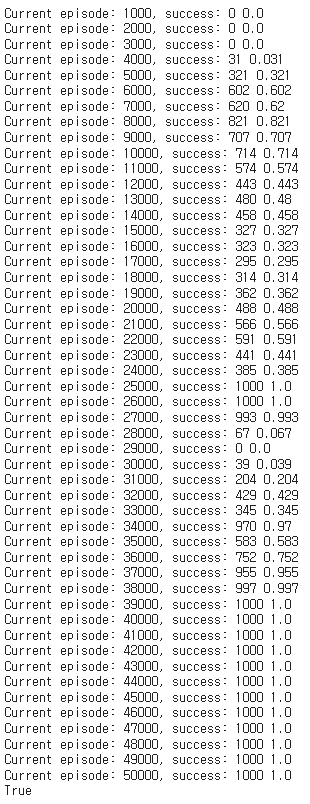

보시다시피 성공적인 에피소드의 수는 일반적으로 교육이 진행됨에 따라 증가합니다. 처음으로 1,000회 이상 100% 성공을 관찰했다고 해서 학습을 멈추는 것은 바람직하지 않습니다. 대부분의 게임에는 임의성이 있으므로 에이전트가 새로 실행해도 100% 성공률을 유지한다는 보장은 없습니다. 여러 업데이트 간격 동안 에이전트가 100%에 도달했음을 확인한 후에는 학습을 중지하는 것이 안전할 수 있습니다다

(실험 결과는 로컬에서 확인)